In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv("C:/Users/vinic/OneDrive/Documentos/Fis-26/LAB2RIDENTI/data.csv",encoding='utf-8', sep=",", error_bad_lines=False)

C:\Users\vinic\AppData\Local\Temp\ipykernel_13892\983685298.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data = pd.read_csv("C:/Users/vinic/OneDrive/Documentos/Fis-26/LAB2RIDENTI/data.csv",encoding='utf-8', sep=",", error_bad_lines=False)


In [7]:
data['x'] = data['n']*np.sqrt(data['m(g)'])
data.head()

,f(Hz),n,m(g),l(cm),x
0,22,1,37.30,110,6.107373
1,45,2,37.30,110,12.214745
2,67,3,37.30,110,18.322118
3,22,1,37.30,110,6.107373
4,30,1,68.05,110,8.249242


In [29]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt  # To visualize
r = LinearRegression()
l = len(data['x'])
X = data['x'].values.reshape(-1, 1)
Y = data['f(Hz)'].values.reshape(-1, 1)
r.fit(X,Y)
Y_pred = r.predict(X)

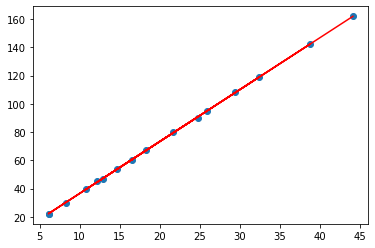

In [28]:
plt.scatter(X,Y)
plt.plot(X,Y_pred,color='red')
plt.show()

In [34]:
alpha = np.dot(X,Y)/np.dot(X,X)
Y_fit = alpha*X  # valores ajustados segundo a solução
Y_res = Y - Y_fit  # resíduos absolutos

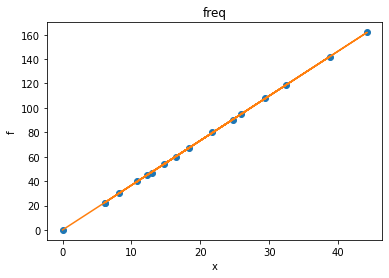

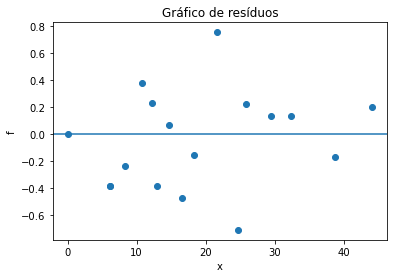

 ang = 3.665  Incerteza = 0.004, inf = 0.369 


In [44]:

_, ax = plt.subplots()
plt.title(u'freq')
plt.plot(X, Y, 'o')
plt.plot(X, Y_fit, '-')
plt.xlabel(u'x')
plt.ylabel(u'f')

_, ax = plt.subplots()
plt.title(u'Gráfico de resíduos')
plt.plot(X, Y_res, 'o')
plt.axhline(0)
plt.xlabel(u'x')
plt.ylabel(u'f')

plt.show()

# Estima variância dos dados
chi2 = np.dot(Y - Y_fit, Y - Y_fit)
ngl = len(Y) - 1
var = chi2 / ngl
df = np.sqrt(var)
# Não é necessário calcular novamente os parâmetros
# Variância constante não afeta a estimativa dos parâme tros

# Calcula a matriz de covariância dos parâmetros
cov = var/np.dot(X,X)

# Calcula constante de Hubble
H0 = alpha
s_H0 = np.sqrt(cov)
print(u' ang = %.3f  Incerteza = %.3f, inf = %.3f ' % (H0, s_H0, df))

In [49]:
m = 9.786*100*1000/((2*H0*110)**2)
print(m)
dm = 2*m*np.sqrt((0.05/110)**2+(0.004/3.665)**2)
print(dm)

1.5048535565586791
0.0035583048765049545
